| Name:| Tufan Kundu|
|-|-|
|Registration number:| 24MDT0184|
| Course code:| PMDS602P|
| Course:| Advanced Machine Learning Lab|
| Slot:| L7+L8|
| Assignment:| 1|

## 1. Generate a set of multivariate three-dimensional data following normal distribution with mean µ = [4, 6, 8]T and covariance matrix Σ =[[1 0 0],[0 3 1],[0 1 1]] having size 1000. Plot the generated points in a 3d plot.Further, generate a dataset of two-dimensional points following normal distribution, forming a circle with radius 5 centred around [1, 0]T. Plot the generated points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mean_3d = np.array([4,6,8])
cov_3d = np.array([[1,0,0],[0,3,1],[0,1,1]])

dist_3d = np.random.multivariate_normal(mean_3d, cov_3d, size = 1000)
dist_3d


array([[3.5555288 , 8.55785764, 9.36095131],
       [5.14653856, 1.81712041, 5.71402274],
       [5.29963451, 4.73259657, 6.68603442],
       ...,
       [4.06979998, 7.02388986, 8.43001364],
       [3.38897145, 8.44096368, 9.12522204],
       [4.18667825, 8.19602467, 7.77445661]])

### Plotting the points 

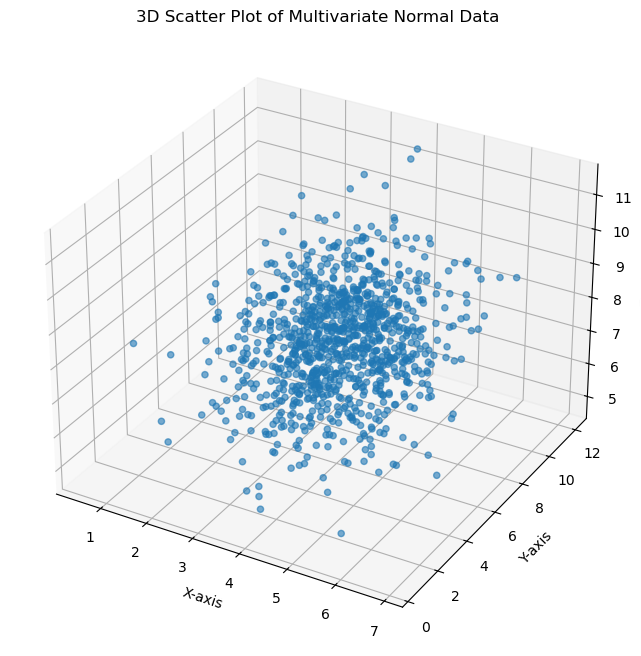

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dist_3d[:, 0], dist_3d[:, 1], dist_3d[:, 2], alpha=0.6)
ax.set_title('3D Scatter Plot of Multivariate Normal Data')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

### 2d distribution

In [11]:
mean_2d = np.array([1,0])
cov_2d = np.array([[25,0],[0,25]])
dist_2d = np.random.multivariate_normal(mean_2d,cov_2d, size = 1000)
dist_2d

array([[ 2.42821174,  0.9296129 ],
       [ 1.94033871,  9.47491359],
       [ 2.0798545 , -0.67072333],
       ...,
       [-1.94561314,  4.77939021],
       [ 3.06701875, -5.65779277],
       [ 7.8776851 ,  2.83813679]])

### plot

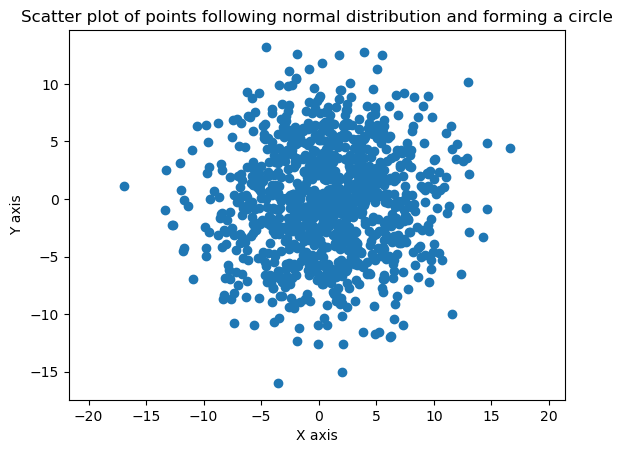

In [20]:
plt.scatter(dist_2d[:,0],dist_2d[:,1])
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Scatter plot of points following normal distribution and forming a circle")
plt.axis("equal")
plt.show()

## 2. Identify (with justification) the outlier(s) amongst the data A = {[1, 0]T , [0, 1]T ,[1, 1]T, [1, 1.5]T, [1.5, 1]T, , [1.5, 1.5]T , [2, 1.5]T , [1.5, 2]T , [1, 2]T , [10000, 15000]T , [20000, 15000]T , [1, 15000]T }. Consider the level of significance to be 5%. If you modify the level of significance to be 10% how would your answer change? If it were 15%?

In [19]:
## Finding outlier by mahalanobis method

from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

data = np.array([[1,0],[0,1],[1,1],[1,1.5],[1.5,1],[1.5,1.5],[2,1.5],[1.5,2],[1,2],
                 [10000,15000],[20000,15000],[1,15000]])

mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data.T)
inv_cov_mat = np.linalg.inv(cov_matrix)

# Mahalanobis distance
distances = [mahalanobis(d, mean_vector, inv_cov_mat) for d in data]

# thresholds

## 5% level of significance
threshold_5 = np.sqrt(chi2.ppf(0.95, 2)) 

## 10% level of significance
threshold_10 = np.sqrt(chi2.ppf(0.90, 2))

## 15% level of significance
threshold_15 = np.sqrt(chi2.ppf(0.85, 2))

df = pd.DataFrame(data, columns=['X','Y'])
df['Mahalanobis_Distance'] = distances
df['outlier_5%'] = df['Mahalanobis_Distance'] > threshold_5
df['outlier_10%'] = df['Mahalanobis_Distance'] > threshold_10
df['outlier_15%'] = df['Mahalanobis_Distance'] > threshold_15

df

,X,Y,Mahalanobis_Distance,outlier_5%,outlier_10%,outlier_15%
0,1.0,0.0,0.552959,False,False,False
1,0.0,1.0,0.552812,False,False,False
2,1.0,1.0,0.552812,False,False,False
3,1.0,1.5,0.552738,False,False,False
4,1.5,1.0,0.552812,False,False,False
5,1.5,1.5,0.552738,False,False,False
6,2.0,1.5,0.552738,False,False,False
7,1.5,2.0,0.552664,False,False,False
8,1.0,2.0,0.552664,False,False,False
9,10000.0,15000.0,1.658312,False,False,False


## `inference:`
- in all the three level of significance we get the same outliers i.e [20000,15000] and [1,15000]